In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [12]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# data=pd.read_csv('C:/Student/IRONHACK/Week1/D3/Lessons/merged_clean_reduced.csv')
data=pd.read_csv('C:/Student/IRONHACK/Week1/D4_Regression/Labs/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [14]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)

numerical.head(1)
categorical.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


#### 2. Now we will try to check the normality of the numerical variables visually
* Use seaborn library to construct distribution plots for the numerical variables
* Use Matplotlib to construct histograms
* Do the distributions for different numerical variables look like a normal distribution? NO

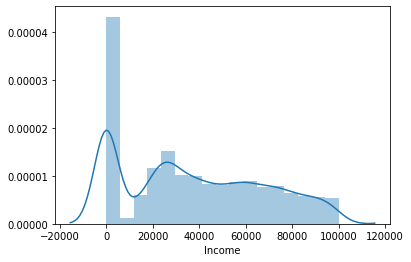

In [15]:
sns.distplot(data['Income'])
plt.show()

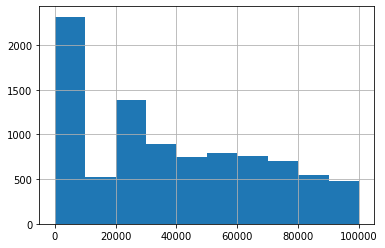

In [16]:
data['Income'].hist()
plt.show()

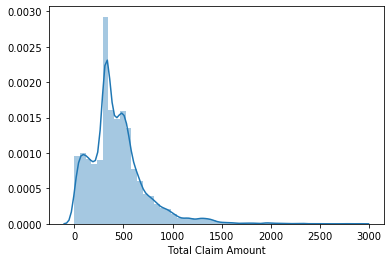

In [23]:
sns.distplot(data['Total Claim Amount'])
plt.show()

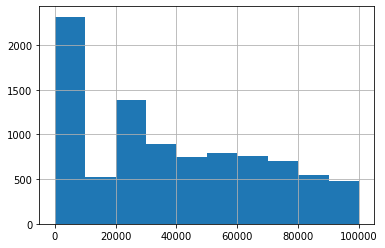

In [18]:
data['Total Claim Amount'].hist()
plt.show()

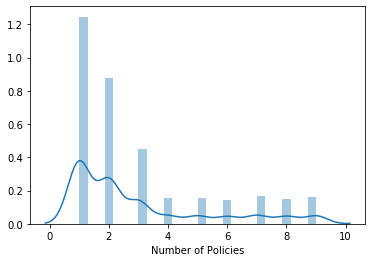

In [22]:
sns.distplot(data['Number of Policies'])
plt.show()

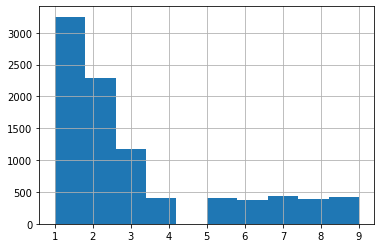

In [21]:
data['Number of Policies'].hist()
plt.show()

#### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [28]:
corr_matrix = numerical.corr()
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


#### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

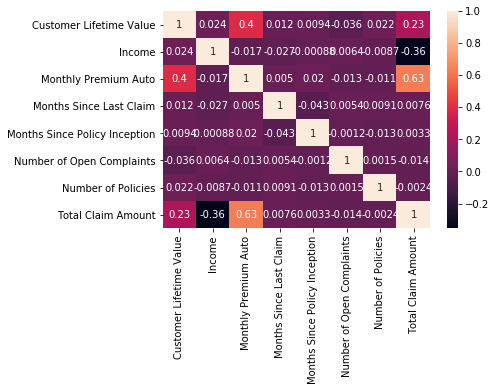

In [29]:
sns.heatmap(corr_matrix, annot=True)
plt.show()